# Propagación del error en una sola variable

Material en construcción, Edgar Rueda, marzo 2021

**Conocimientos previos recomendados**
- Concepto de error estándar
- Concepto de error en el error.

**Bibliografía**
- Hughes, I., & Hase, T. (2010). Measurements and their uncertainties: a practical guide to modern error analysis. Oxford University Press.

- Lyons, L., & Louis, L. (1991). A practical guide to data analysis for physical science students. Cambridge University Press.

- Squires, G. L. (2001). Practical physics. Cambridge university press.


## 1. Error en la variable directa
Hasta ahora sabemos que cuando tenemos una variable directa, es decir, que podemos medirla directamente con un instrumento, pueden ocurrir dos cosas, que solo midamos una vez, o que el instrumento siempre nos de el mismo valor: aquí reportamos el valor y por defecto como error reportamos la apreciación del instrumento:

$$ X = x_I \pm \Delta_I \quad (1)$$

donde $x_I$ es el valor en el instrumento y $\Delta_I$ es la apreciación del instrumento.

La otra opción es cuando el valor en el instrumento fluctua, entonces luego de varias mediciones reportamos el valor promedio y el error estándar:

$$ X = \bar x \pm \alpha \quad (2) $$

donde $\bar x$ es el valor central y $\alpha$ es el error estándar.

**Nota**: el valor central, que corresponde al valor promedio, también se le llama valor nominal, o mejor estimación de la medida.



## 2. Error en la variable indirecta
En algunas ocasiones la variable de interés no la podemos medir directamente con el instrumento, en cambio, debemos usar una función matemática para obtenerla a partir de una variable directa: $Y = y(X)$. Pero como nuestra variable directa tiene una incertidumbre (según la ecuación 2 sabemos el valor de la variable directa con una confiabilidad del 68%), nuestra variable indirecta $Y$ tendrá también una incertidumbre.

La forma más conservadora de determinar $Y$ y su incertidumbre es calcular los valores extremos $y(\bar x + \alpha)$ y $y(\bar x - \alpha)$, o $y(x_I + \Delta_I)$ y $y(x_I - \Delta_I)$, y definir el nuevo intervalo

$$Y = y(\bar x)_{-\alpha_d}^{+\alpha_u} \quad (3a)$$

o

$$Y = y(x_I)_{-\Delta_d}^{+\Delta_u} \quad (3b)$$

donde $\Delta_d$ o $\alpha_d$ define el límite inferior, y $\Delta_u$ o $\alpha_u$ define el límite superior. Note que esto nos indica que no tiene que haber simetría alrededor del valor central.

**Nota**: cuando el error es asimétrico se debe tener precaución con la interpretación que se da del mismo en términos de confiabilidad, esto porque la asimetría indica que la distribución de la variable indirecta no es gaussiana, y la definición de confiabilidad la hicimos a partir de una distribución gaussiana.

## 3. Ejemplo
Supongamos que nuestra variable directa es $X = 3.4 \pm 0.5$, y que nuestra variable indirecta está definida por la función $Y = \sqrt{X}$, entonces aplicando lo visto arriba el valor a reportar será:

$$Y = 1.84_{-0.14}^{+0.13}$$

In [ ]:
#@title Código:
import numpy as np
x = 3.4
ex = 0.5
y = np.sqrt(x)
alpha1 = np.sqrt(x + ex)
alpha2 = np.sqrt(x - ex)
print('y = %f, alpha1 = %f, alpha2 = %f'%(y,alpha1, alpha2))

y = 1.843909, alpha1 = 1.974842, alpha2 = 1.702939


#3. Incertidumbres pequeñas y simétricas
Hasta ahora hemos visto como lidiar con cualquier tipo de error, pero en principio si estamos midiendo bien, con los instrumentos adecuados, nuestros errores deberían ser pequeños y simétricos. Podemos entonces escribir:

$$\Delta_Y = \frac{y(x_0 + \Delta x) - y(x_0)}{\Delta x} \Delta x \quad (4)$$

donde $x_0 = \bar x = x_I$, y $\Delta x = \alpha = \Delta_I$. Gráficamente lo podemos observar en la figura 1.

<img src="https://docs.google.com/uc?export=download&id=1mwu5MbxSdY6uy4vB3g8uB7Albg_nGVEd" width="400" height="350"> 

Figura 1. Derivada como la tangente de la curva. $\Delta x = x_0 -x$.


Ahora, cuando el error tiende a cero, en el límite, obtenemos la definición de la derivada,

$$ \text{lim}_{\alpha \to 0} \frac{y(x_0 + \alpha) - y(x_0)}{\alpha} = \frac{dy}{dx}\bigg|_{x_0} \quad (5) $$

y podemos reescribir el error en $Y$ como 

$$ \alpha_Y = \bigg|\frac{dy}{dx}\bigg|_{x_0}\alpha \quad (6) $$

Note que la derivada se toma con su valor absoluto puesto que la incertidumbre será simétrica alrededor del valor central, y siempre es positiva. Para el caso de una sola medida se reemplaza $\alpha$ por $\delta_I$, siendo $\delta_1 = \Delta_I \to 0$.

Finalmente, el valor a reportar de una variable indirecta, cuando dicha variable solo depende de una variable directa cuya incertidumbre es pequeña, será:

$$ Y = y(x_0) \pm \alpha_Y \quad (7) $$

## 4.  Ejemplo
Del ejemplo anterior, si nuestra variable directa es $X = 3.452 \pm 0.012$, pero ahora con una incertidumbre aproximadamente un orden de magnitud menor, y que nuestra variable indirecta está definida por la función $Y = \sqrt{X}$, entonces aplicando lo visto en la sección 2 el valor a reportar será:

$$Y = 1.857_{-0.003}^{+0.003}$$

In [ ]:
#@title Código:
import numpy as np
x = 3.45
ex = 0.012
y = np.sqrt(x)
alpha1 = np.sqrt(x + ex)
alpha2 = np.sqrt(x - ex)
print('y = %f, alpha1 = %f, alpha2 = %f'%(y,alpha1, alpha2))
print('mayor',(alpha1-y))
print('menor',(y-alpha2))

y = 1.857418, alpha1 = 1.860645, alpha2 = 1.854184
mayor 0.0032274873378295155
menor 0.003233105257177682


Si usamos la ecuación 7 el error en la variable indirecta será

$$ \alpha_Y = \bigg|\frac{1}{2\sqrt{X}}\bigg|_{X_0=3.452}\times 0.013 = 0.003$$

Y por lo tanto el valor de la variable indirecta será $ Y = 1.857 \pm 0.003 $.

In [ ]:
#@title Código:
(1/2/np.sqrt(3.452))*0.012

0.0032293555028950894

Para esta incertidumbre en la variable directa ambos resultados fueron iguales, y por lo tanto la incertidumbre en la variable indirecta se reporta una vez y se usa el símbolo $\pm$. Tuvimos que bajar dos órdenes de magnitud para que el error se pudiera aproximar con la derivada. En general, no se suele ser tan extrictos con el uso de la definición del error en términos de derivada, y queda bajo criterio del experimentador decidir si es correcto usarlo.

##5. Simulación
Vamos a simular el experimento suponiendo que el error en $X$ es aletorio y sigue una distribución gaussiana: miremos que tipo de distribución nos da $Y$. Sea $X$ una variable directa con media $3.4$ y dispersión de $1.3$, y $Y=\sqrt{X}$ una variable indirecta que queremos medir. Contruyamos una distribución para $X$, y tomemos $N=30$ datos de dicha distribución para determinar el valor central $\bar x$ y el error estándar $\alpha_x$ de la variable directa $X$. Luego determinemos la distribución de $Y$ con los $N$ datos.

x_bar 3.4705577344603293
x_err 0.2792701218975839
y_bar 1.86294329877759
y_err 0.07495400479467972


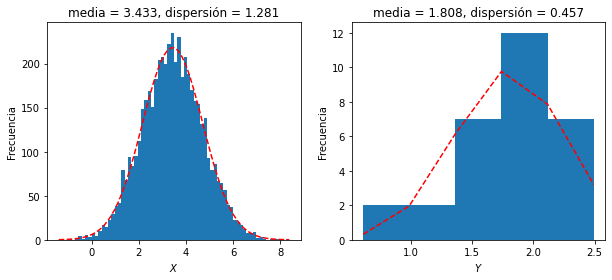

In [ ]:
#@title Código...
#@markdown Forms support many types of fields.
Valor_central = "3.452" #@param ["3.4","3.452"] {allow-input: true}
Dispersion = "1.3" #@param ["1.3","2.0"] {allow-input: true}
Tamaño_muestra = "30" #@param ["5","30"] {allow-input: true}
#@markdown ---

import pylab as plt
from scipy.stats import norm

np.random.seed(0)
X = float(Valor_central)
eX = float(Dispersion)
N = int(Tamaño_muestra)
x = np.random.normal(loc=X,scale=eX,size=5000)
xm = np.mean(x)
xdev = np.std(x,ddof=1)

##
xmed = np.random.choice(x,size=N)
x_bar = np.mean(xmed)
x_err = np.std(xmed,ddof=1)/np.sqrt(N)
print('x_bar',x_bar)
print('x_err',x_err)

y_bar = np.sqrt(x_bar)
y_err = x_err*np.sqrt(1/x_bar)/2
print('y_bar',y_bar)
print('y_err',y_err)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.set_title(r'media = %.3f, dispersión = %.3f'%(xm,xdev))
n,bins,patches = ax1.hist(x,bins=int(np.sqrt(len(x))))
ax1.plot(bins,norm.pdf(bins,xm,xdev)*len(x)*(abs(bins[0]-bins[1])),'r--')
ax1.set_xlabel('$X$')
ax1.set_ylabel('Frecuencia')

#Se calcula la distribución de Y
y = np.sqrt(abs(xmed))
ym = np.mean(y)
ydev = np.std(y,ddof=1)
ax2.set_title(r'media = %.3f, dispersión = %.3f'%(ym,ydev))
n,bins,patches = ax2.hist(y,bins=int(np.sqrt(len(y))))
ax2.plot(bins,norm.pdf(bins,ym,ydev)*len(y)*(abs(bins[0]-bins[1])),'r--')
ax2.set_xlabel('$Y$')
ax2.set_ylabel('Frecuencia')
fig.show()

**Análisis**:
El valor obtenido para la variable directa fue $X = 3.4 \pm 0.3$. Y aplicando propagación del error el valor obtenido para la variable indirecta fue $Y = 1.85 \pm 0.08$.

Si ahora miramos la distribución que obtuvimos para $Y$ calculando los $N=30$ datos la media es $1.79$ con desviación estándar de $0.46$. Comparado con el resultado de la propagación del error, el valor central concuerda pero el error que se puede obtener de la distribución es mucho más grande.

Si ahora aplicamos el teorema del límite central a la distribución de $Y$ obtenemos:

In [ ]:
#@title Código...
erry = ydev/np.sqrt(len(y))
print('ym',ym)
print('erry',erry)

ym 1.8080203887152835
erry 0.08338113746218893


Con los $30$ calculados el valor a reportar sería $Y = 1.79 \pm 0.08$. 

**Conclusión**: Podemos decir que no hay diferencia entre usar propagación del error o determinar el error estándar de la variable indirecta. Algo particular que se observa para este caso es que el valor central para la propagación siempre da mayor que el obtenido con la distribución; este resultado, aunque extraño, se explica a través de la desigualdad de Jensen.  Importante recordar  que para que sea mayor o menor depende de la función $y=y(x)$. No obstante, como no conocemos a priori el valor exacto es indiferente la técnica que se use.